In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("C:/Users/KIIT0001/Downloads/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
y=df['Survived']

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
X=df[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [8]:
gender=df['Sex']

In [9]:
import seaborn as sns 

<Axes: xlabel='Sex', ylabel='count'>

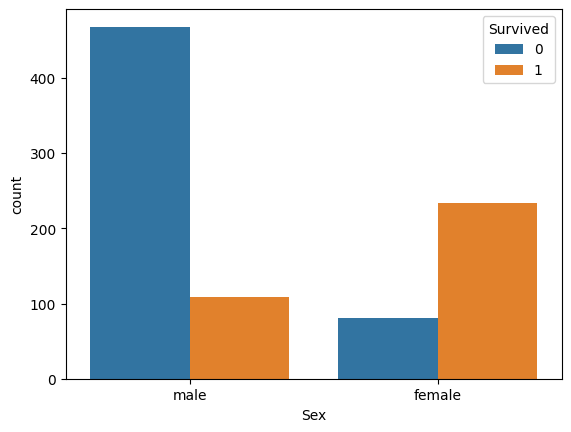

In [10]:
sns.countplot(x=gender,hue='Survived',data=df)

In [11]:
final_gend=pd.get_dummies(gender,drop_first=True)

In [12]:
Pclass=df['Pclass']

<Axes: xlabel='Pclass', ylabel='count'>

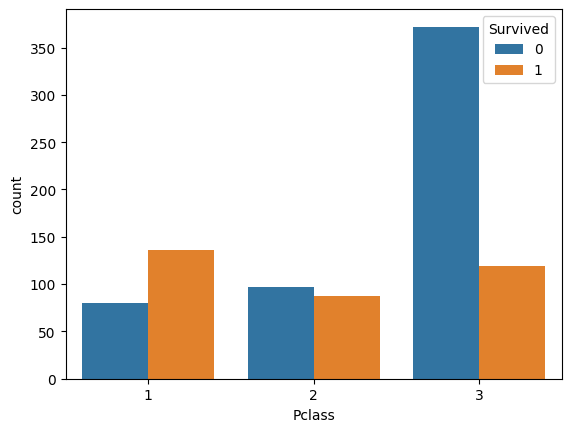

In [13]:
sns.countplot(x=Pclass , hue="Survived" , data=df)

In [14]:
Pclass_final=pd.get_dummies(Pclass,drop_first=True)

<Axes: >

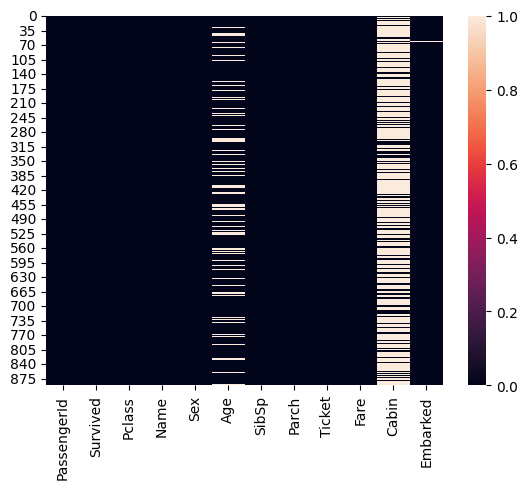

In [15]:
sns.heatmap(df.isnull())

In [16]:
#since there are too many null values in the cabin column,so by force we have to eliminate the value(kuch kr nhi skte)

In [17]:
X=df[[ 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [18]:
age=df['Age']

In [19]:
#in age there are some missing values so we have to remove it

In [20]:
age1=int(df[df['Pclass']==1]['Age'].mean())

In [21]:
age2=int(df[df['Pclass']==2]['Age'].mean())

In [22]:
age3=int(df[df['Pclass']==3]['Age'].mean())

In [23]:
import numpy as np

In [24]:
np.isnan(age)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [25]:
def ageMissing(d):
    Pclass=d[0]
    age=d[1]
    if np.isnan(age):
        if Pclass==1:
            return age1
        elif Pclass==2:
            return age2 
        elif Pclass ==3:
            return age3
        else:
            return 0
    else: 
        return age 

In [26]:
df.iloc[0][['Pclass','Age']]

Pclass       3
Age       22.0
Name: 0, dtype: object

In [27]:
df['Age']=df[['Pclass','Age']].apply(ageMissing,axis=1)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26084\1981556304.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=d[0]
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26084\1981556304.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=d[1]


In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='SibSp', ylabel='count'>

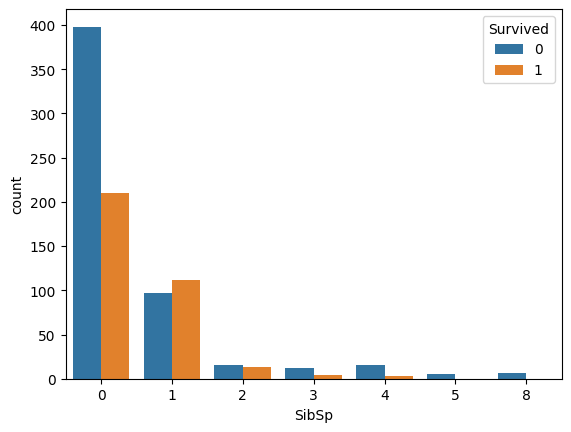

In [29]:
sns.countplot(x='SibSp',hue='Survived',data=df)

<Axes: xlabel='Parch', ylabel='count'>

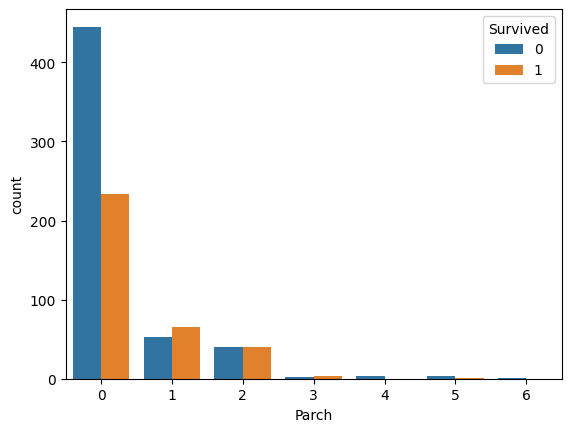

In [30]:
sns.countplot(x='Parch',hue='Survived',data=df)

In [31]:
#fare has been eliminated because it has a direct dependency with Pclass so dependent variables have to be rempved so fare is feature eliminated 

In [32]:
final_class=pd.get_dummies(df['Pclass'],drop_first=True)
final_gender=pd.get_dummies(df['Sex'],drop_first=True)
df['Age']=df[['Pclass','Age']].apply(ageMissing,axis=1)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26084\1981556304.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=d[0]
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26084\1981556304.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=d[1]


In [33]:
X=pd.concat([df['Age'],final_class,final_gender],axis=1)

In [34]:
X

,Age,2,3,male
0,22.0,False,True,True
1,38.0,False,False,False
2,26.0,False,True,False
3,35.0,False,False,False
4,35.0,False,True,True
...,...,...,...,...
886,27.0,True,False,True
887,19.0,False,False,False
888,25.0,False,True,False
889,26.0,False,False,True


In [35]:
X.columns=X.columns.astype(str)

In [36]:
y=df['Survived']

In [37]:
#from sklearn.linear_model import LogisticRegression

In [38]:
#model=LogisticRegression()

In [39]:
#model.fit(X,y)

In [40]:
#model.coef_

In [41]:
#model.predict(X)

In [42]:
#y

In [43]:
#df_test=pd.read_csv("C:/Users/KIIT0001/Downloads/test.csv")

In [44]:
#final_class=pd.get_dummies(df_test['Pclass'],drop_first=True)
#final_gender=pd.get_dummies(df_test['Sex'],drop_first=True)
#df_test['Age']=df_test[['Pclass','Age']].apply(ageMissing,axis=1)
#X_test=pd.concat([df_test['Age'],final_class,final_gender],axis=1)
#X_test.columns=X_test.columns.astype(str)

In [45]:
#model.predict(X_test)

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
final_class=pd.get_dummies(df['Pclass'],drop_first=True)
final_gender=pd.get_dummies(df['Sex'],drop_first=True)
df['Age']=df[['Pclass','Age']].apply(ageMissing,axis=1)
df=pd.concat([df['Age'],df['Survived'],final_class,final_gender],axis=1)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26084\1981556304.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=d[0]
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26084\1981556304.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=d[1]


In [48]:
df

,Age,Survived,2,3,male
0,22.0,0,False,True,True
1,38.0,1,False,False,False
2,26.0,1,False,True,False
3,35.0,1,False,False,False
4,35.0,0,False,True,True
...,...,...,...,...,...
886,27.0,0,True,False,True
887,19.0,1,False,False,False
888,25.0,0,False,True,False
889,26.0,1,False,False,True


In [49]:
df.columns=df.columns.astype(str)

In [50]:
df.columns

Index(['Age', 'Survived', '2', '3', 'male'], dtype='object')

In [51]:
X=df[['Age', '2', '3', 'male']]

In [52]:
y=df['Survived']

In [53]:
X

,Age,2,3,male
0,22.0,False,True,True
1,38.0,False,False,False
2,26.0,False,True,False
3,35.0,False,False,False
4,35.0,False,True,True
...,...,...,...,...
886,27.0,True,False,True
887,19.0,False,False,False
888,25.0,False,True,False
889,26.0,False,False,True


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
 X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
mind=LogisticRegression()

In [58]:
mind.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred=mind.predict(X_test)

In [60]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,y_pred)

array([[92, 13],
       [22, 52]], dtype=int64)

In [63]:
(92+52) / (92+13+22+52) *100

80.44692737430168

In [64]:
#model is 80% accurate 